# Interactive episode
Analyze interactively how did car behave every step.

In [1]:
import math
import pandas as pd
import numpy as np
import plotly.express as px
from deepracer.tracks import TrackIO, Track
from deepracer.logs import CloudWatchLogs as cw, \
    SimulationLogsIO as slio, \
    AnalysisUtils as au, \
    PlottingUtils as pu
%matplotlib notebook

## Load track

In [2]:
!ls tracks/

AmericasGeneratedInclStart.npy	New_York_Eval_Track.npy
AWS_track.npy			New_York_Track.npy
Bowtie_track.npy		Oval_track.npy
Canada_Eval.npy			reInvent2019_track.npy
Canada_Training.npy		reInvent2019_wide_mirrored.npy
China_eval_track.npy		reInvent2019_wide.npy
China_track.npy			reinvent_base.npy
FS_June2020.npy			Spain_track.npy
H_track.npy			Straight_track.npy
LGSWide.npy			Tokyo_Training_track.npy
London_Loop_Train.npy		Vegas_track.npy
Mexico_track_eval.npy		Virtual_May19_Train_track.npy
Mexico_track.npy


In [3]:
tu = TrackIO()

In [4]:
track = tu.load_track("reInvent2019_track")

Loaded 155 waypoints


In [5]:
def plot_track(t, fig=None):
    ratio = (lambda x,y: x / y)(*t.size())
    if fig is None:
        fig = plt.figure(figsize=(16,8))
    ax = fig.add_subplot()
    ax.axis('equal')
    ax.plot(*t.center_line.T, 'b')
    ax.plot(*t.outer_border.T, 'b')
    ax.plot(*t.inner_border.T, 'b')
    return ax

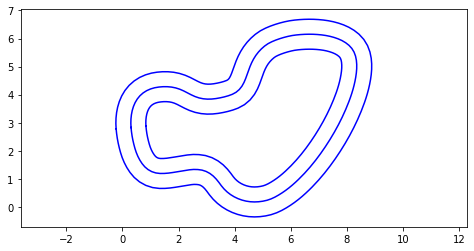

In [6]:
fig = plt.figure(figsize=(8,4))
ax = plot_track(track, fig)

## Load log

In [9]:
stream_name = 'XTS-kappa' ## CHANGE This to your simulation application ID
fname = 'logs/deepracer-%s.log' %stream_name  # The log will be downloaded into the specified path

In [10]:
cw.download_log(fname, stream_prefix=stream_name)  # add force=True if you downloaded the file before but want to repeat

Log file exists, use force=True to download again


In [13]:
EPISODES_PER_ITERATION = 40 #  Set to value of your hyperparameter in training

data = slio.load_data(fname)
df = slio.convert_to_pandas(data, episodes_per_iteration=EPISODES_PER_ITERATION)

df = df.sort_values(['episode', 'steps'])

In [14]:
df

,iteration,episode,steps,x,y,yaw,steer,throttle,action,reward,done,on_track,progress,closest_waypoint,track_len,timestamp
0,1,0,3,0.3294,2.6495,-83.1308,-15.0,2.2,1.0,1.5755,0,True,0.7892,1,23.12,1592825104.5121763
1,1,0,4,0.3387,2.5980,-82.0823,15.0,2.2,5.0,1.6669,0,True,1.0152,2,23.12,1592825104.5871804
2,1,0,5,0.3496,2.5403,-81.1293,-3.0,2.9,2.0,1.6889,0,True,1.2690,2,23.12,1592825104.6999643
3,1,0,6,0.3684,2.4479,-79.8422,30.0,1.4,6.0,1.8155,0,True,1.6783,3,23.12,1592825104.7981915
4,1,0,7,0.3847,2.3775,-78.6707,-3.0,2.9,2.0,1.7378,0,True,1.9924,3,23.12,1592825104.9022822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57872,23,919,56,4.9500,-0.1680,-37.5724,30.0,1.4,6.0,2.0498,0,True,31.3379,41,23.12,1592833523.705073
57873,23,919,57,5.0132,-0.2050,-34.4433,30.0,1.4,6.0,1.7378,0,True,31.5878,42,23.12,1592833523.8044674
57874,23,919,58,5.1059,-0.2492,-29.6301,-3.0,2.9,2.0,0.0113,0,False,31.7872,42,23.12,1592833523.8910596
57875,23,919,59,5.2362,-0.2929,-22.4220,0.0,3.1,3.0,0.0131,0,False,32.2956,43,23.12,1592833524.0261035


# Create interactive plot
Uses plotly and requires jupyter in classic notebook mode to work.

In [ ]:
px.scatter(df, x='x', y='y', color='throttle', size='reward', animation_frame='episode')